In [162]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Investing in Austin - Clustering

In [163]:
df = pd.read_csv("airbnb_listings_austin.csv")

# preview data
df.info()
df.head
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2410 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

### Clustering
##### Segment the Airbnb properties in the Austin area into different groups.  Provide a profile of each segment.  Which segments command the highest nightly rates?  Which segments get the best guest ratings?  Which segments have the highest percentage of “booked” units?

In [164]:
# only keep property-related columns, no unique text columns
columns_to_drop = ["id", "listing_url", "name", "summary", "space", "description","amenities", "experiences_offered", "neighborhood_overview", "notes", "transit", "host_id", "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_response_rate", "host_is_superhost", "host_listings_count", "host_has_profile_pic", "host_identity_verified", "neighbourhood", "city"]
df1 = df.drop(columns=columns_to_drop)
df1

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,House,Private room,6,2.5,1.0,3.0,Real Bed,3600.0,$300.00,NaN,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,Camper/RV,Private room,2,0.0,1.0,1.0,Futon,NaN,$99.00,$600.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,House,Private room,2,1.5,1.0,1.0,Real Bed,NaN,$100.00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,House,Private room,2,1.5,1.0,1.0,Real Bed,NaN,$100.00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,$599.00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,$179.00,NaN,...,9,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,strict
5831,Condominium,Private room,2,1.0,1.0,2.0,Real Bed,NaN,$85.00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
5832,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,$66.00,NaN,...,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t,strict
5833,Apartment,Shared room,1,1.0,1.0,1.0,Real Bed,NaN,$25.00,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible


In [165]:
# total count of NaN values
print(df1.isnull().sum())

property_type                     0
room_type                         0
accommodates                      0
bathrooms                        46
bedrooms                          6
beds                             23
bed_type                          0
square_feet                    5533
price                             0
weekly_price                   3608
security_deposit               3065
cleaning_fee                   2248
guests_included                   0
extra_people                      0
minimum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating           2046
review_scores_accuracy         2059
review_scores_cleanliness      2057
review_scores_checkin          2057
review_scores_communication    2057
review_scores_location         2056
review_scores_value         

In [166]:
# drop nonessential columns with too many NaN values
#columns_to_drop = ["square_feet", "weekly_price", "security_deposit", "cleaning_fee", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]
columns_to_drop = ["square_feet", "weekly_price", "security_deposit", "cleaning_fee"]
df1 = df1.drop(columns=columns_to_drop)
df1

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,House,Private room,6,2.5,1.0,3.0,Real Bed,$300.00,1,$0.00,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,Camper/RV,Private room,2,0.0,1.0,1.0,Futon,$99.00,1,$0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,House,Private room,2,1.5,1.0,1.0,Real Bed,$100.00,1,$0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,House,Private room,2,1.5,1.0,1.0,Real Bed,$100.00,1,$0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,$599.00,1,$0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,$179.00,3,$50.00,...,9,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,strict
5831,Condominium,Private room,2,1.0,1.0,2.0,Real Bed,$85.00,1,$5.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
5832,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,$66.00,1,$22.00,...,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t,strict
5833,Apartment,Shared room,1,1.0,1.0,1.0,Real Bed,$25.00,1,$0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible


In [167]:
# clean data types and values
df1['price'] = df1['price'].replace('[\$,]', '', regex=True).astype(float)
df1['extra_people'] = df1['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df1['has_availability'] = df1['has_availability'].map({'f': False, 't': True}).astype(bool)
df1['instant_bookable'] = df1['instant_bookable'].map({'f': False, 't': True}).astype(bool)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                5835 non-null   object 
 1   room_type                    5835 non-null   object 
 2   accommodates                 5835 non-null   int64  
 3   bathrooms                    5789 non-null   float64
 4   bedrooms                     5829 non-null   float64
 5   beds                         5812 non-null   float64
 6   bed_type                     5835 non-null   object 
 7   price                        5835 non-null   float64
 8   guests_included              5835 non-null   int64  
 9   extra_people                 5835 non-null   float64
 10  minimum_nights               5835 non-null   int64  
 11  has_availability             5835 non-null   bool   
 12  availability_30              5835 non-null   int64  
 13  availability_60   

In [168]:
# drop null values & get dummies
df1 = df1.dropna()
df1 = pd.get_dummies(df1, columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy'])
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 5832
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   accommodates                         3741 non-null   int64  
 1   bathrooms                            3741 non-null   float64
 2   bedrooms                             3741 non-null   float64
 3   beds                                 3741 non-null   float64
 4   price                                3741 non-null   float64
 5   guests_included                      3741 non-null   int64  
 6   extra_people                         3741 non-null   float64
 7   minimum_nights                       3741 non-null   int64  
 8   has_availability                     3741 non-null   bool   
 9   availability_30                      3741 non-null   int64  
 10  availability_60                      3741 non-null   int64  
 11  availability_90                    

,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,6,2.5,1.0,3.0,300.0,1,0.0,2,True,0,...,False,False,False,False,True,False,True,False,False,False
7,2,1.0,1.0,1.0,40.0,2,10.0,1,True,16,...,False,False,False,False,True,False,True,False,False,False
9,2,1.0,1.0,1.0,44.0,2,19.0,1,True,29,...,False,False,False,False,True,False,True,False,False,False
11,2,1.0,1.0,1.0,50.0,1,10.0,3,True,24,...,False,False,False,False,True,False,False,False,True,False
12,2,1.0,1.0,1.0,49.0,1,0.0,2,True,25,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,8,3.0,4.0,4.0,500.0,1,0.0,2,True,19,...,False,False,False,False,True,False,False,False,True,False
5828,4,1.0,0.0,1.0,300.0,1,0.0,1,True,0,...,False,False,False,False,True,True,False,False,False,False
5829,4,1.0,1.0,2.0,125.0,1,0.0,1,True,17,...,False,False,False,False,True,False,True,False,False,False
5830,4,1.0,1.0,2.0,179.0,3,50.0,1,True,15,...,False,False,False,False,True,False,False,False,True,False


In [169]:
#Standardize Data
dfcolumns = df1.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df1.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)

df_scaled.head()

,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,0.568222,1.499192,-0.62271,0.439034,0.300078,-0.572028,-0.523265,-0.018136,0.0,-1.446377,...,-0.111576,-0.063449,-0.121021,-0.065539,0.190494,-0.58589,1.675021,-0.016352,-0.959391,-0.046293
1,-0.881296,-0.612433,-0.62271,-0.734547,-0.722513,-0.035294,-0.179041,-0.167908,0.0,-0.039693,...,-0.111576,-0.063449,-0.121021,-0.065539,0.190494,-0.58589,1.675021,-0.016352,-0.959391,-0.046293
2,-0.881296,-0.612433,-0.62271,-0.734547,-0.706780,-0.035294,0.130761,-0.167908,0.0,1.103237,...,-0.111576,-0.063449,-0.121021,-0.065539,0.190494,-0.58589,1.675021,-0.016352,-0.959391,-0.046293
3,-0.881296,-0.612433,-0.62271,-0.734547,-0.683182,-0.572028,-0.179041,0.131636,0.0,0.663648,...,-0.111576,-0.063449,-0.121021,-0.065539,0.190494,-0.58589,-0.597007,-0.016352,1.042328,-0.046293
4,-0.881296,-0.612433,-0.62271,-0.734547,-0.687115,-0.572028,-0.523265,-0.018136,0.0,0.751566,...,-0.111576,-0.063449,-0.121021,-0.065539,0.190494,-0.58589,-0.597007,-0.016352,1.042328,-0.046293


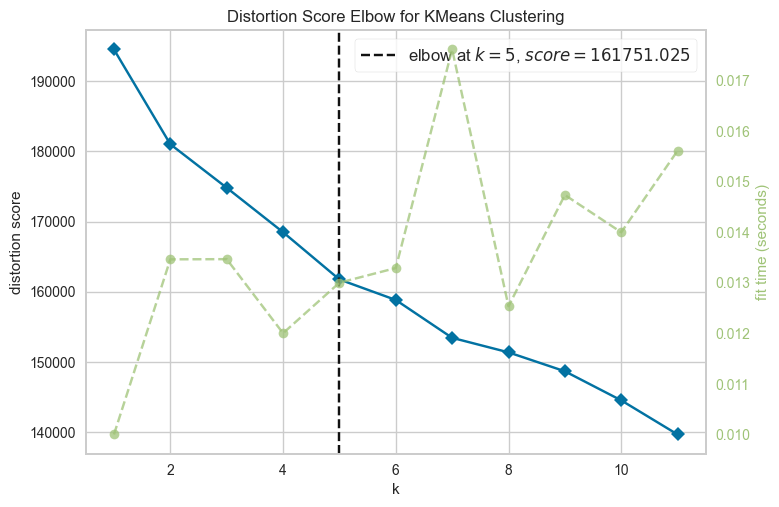

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [179]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(df_scaled)
visualizer.show()

In [171]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=3, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
df1['cluster']=clusters

# Evaluate cluster sizes to insure that they are similar
print(df1['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df1.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)



cluster
0    1662
2    1163
1     916
Name: count, dtype: int64
         accommodates  bathrooms  bedrooms   beds    price  guests_included  \
cluster                                                                       
0               3.073      1.111     1.123  1.486  126.239            1.537   
1               7.954      2.276     3.206  4.309  481.300            3.614   
2               3.599      1.235     1.363  1.727  160.098            1.603   

         extra_people  minimum_nights  has_availability  availability_30  \
cluster                                                                    
0              13.127           2.105               1.0           23.198   
1              25.169           2.266               1.0           20.301   
2              10.315           2.030               1.0            3.778   

         availability_60  availability_90  availability_365  \
cluster                                                       
0                 50.734         

accommodates


<Figure size 800x400 with 0 Axes>

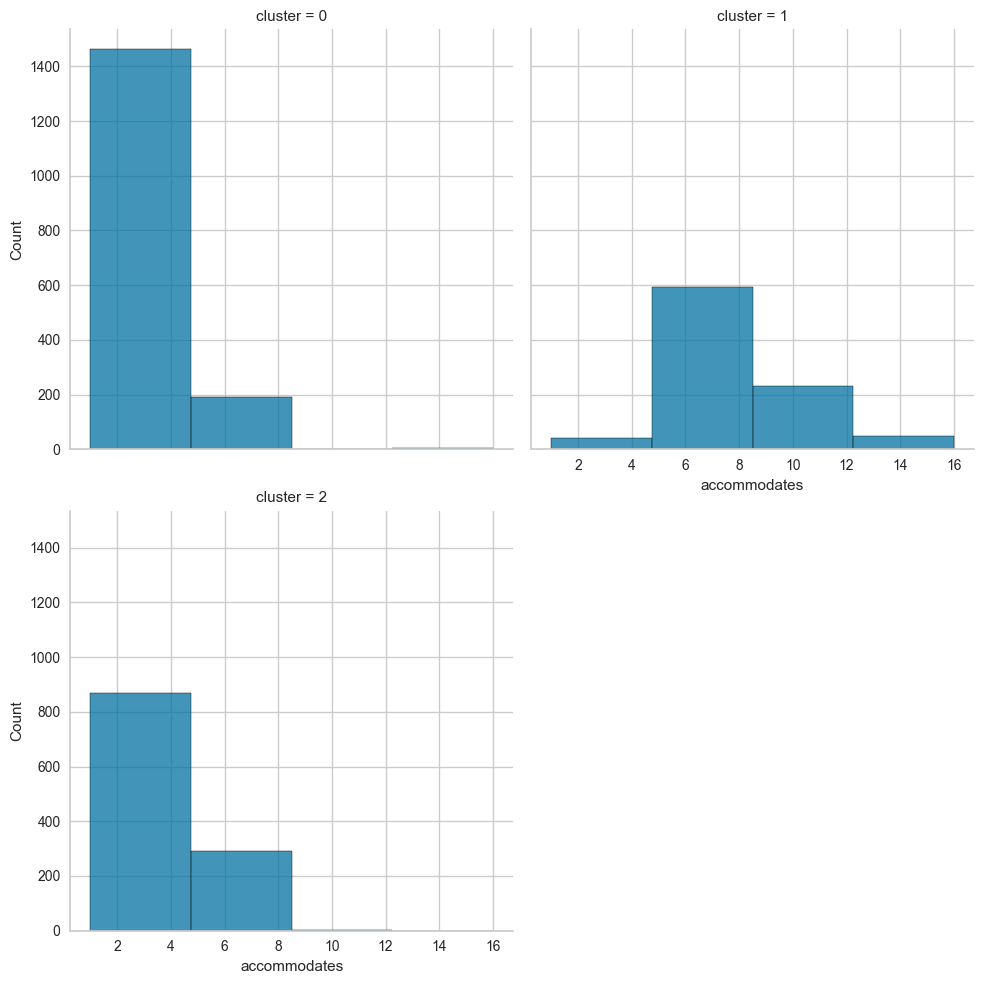

In [172]:
# accommodates
plt.figure(figsize=(8,4))
print("accommodates")
sns.displot(data=df1, x="accommodates", bins=4, col='cluster', col_wrap=2, common_bins=True)
plt.show()


price


<Figure size 800x400 with 0 Axes>

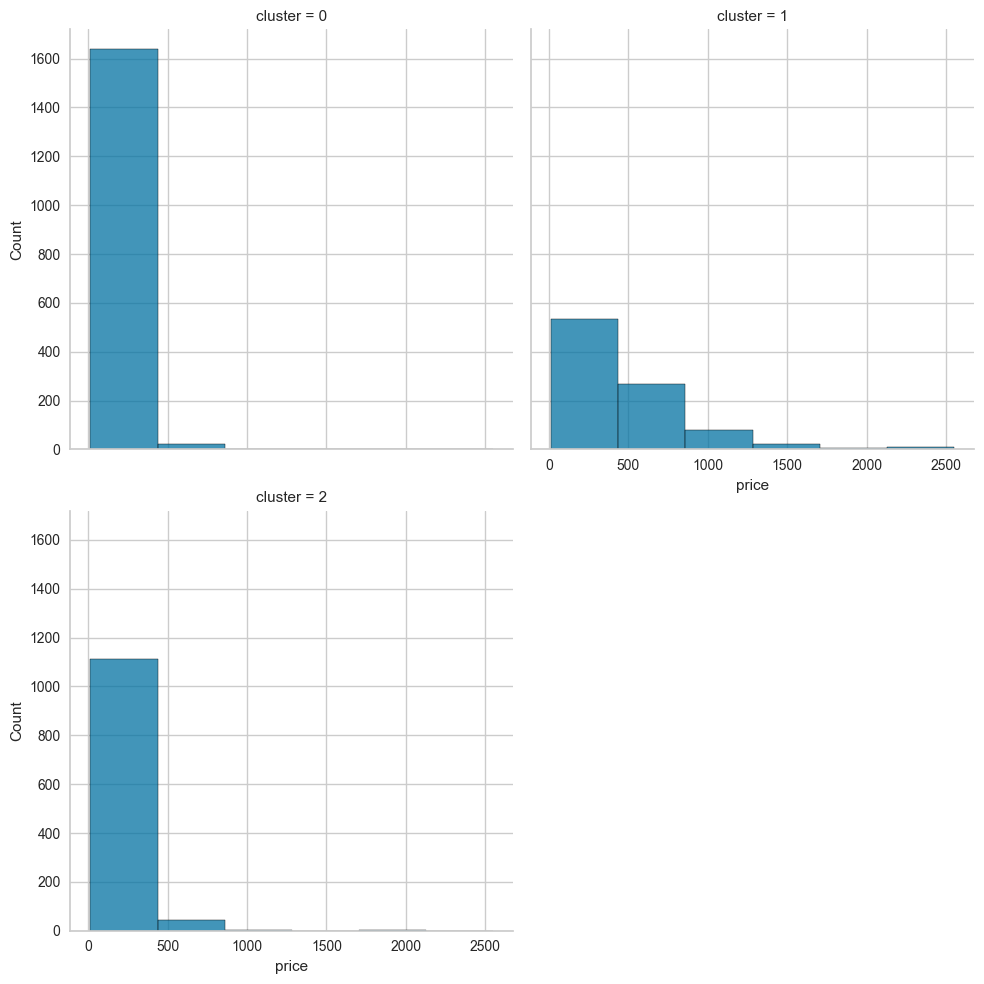

In [173]:
# price
plt.figure(figsize=(8,4))
print("price")
sns.displot(data=df1, x="price", bins=6, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [174]:
all_feats2 = df1.columns.tolist()

def clus_analysis(feat):
    print("Top 10 features with the largest percentage variation between clusters for each feature")
    print("--------------------------------------------------------------------------------------------")
    print("")
    for i in feat:
        if i != 'cluster':  # Skip 'cluster' itself as it can't be grouped with itself
            dfrom = df1[[i, 'cluster']]  # Ensure you're selecting only necessary columns
            df_desc1 = dfrom.groupby('cluster').describe()
            
            print(f"Analysis for feature: {i}")
            print(df_desc1)
            print("")
            print("")
            
            # Check if 'mean' level exists before accessing it
            if 'mean' in df_desc1.columns.get_level_values(1):
                # Calculate the max and min mean values for the feature across clusters
                mean_values = df_desc1.xs('mean', level=1, axis=1)
                max_mean = mean_values.max()
                min_mean = mean_values.min()
                
                # Calculate percentage variation: (max - min) / max * 100
                percentage_variation = ((max_mean - min_mean) / max_mean) * 100
                
                # Sort the features by percentage variation in descending order and select the top 10
                top_10_feats = percentage_variation.sort_values(ascending=False).head(10)
                #print(f": {i}")
                print(top_10_feats)
            else:
                print(f"'mean' level not found in the columns for feature: {i}")

clus_analysis(all_feats2)


Top 10 features with the largest percentage variation between clusters for each feature
--------------------------------------------------------------------------------------------

Analysis for feature: accommodates
        accommodates                                               
               count      mean       std  min  25%  50%   75%   max
cluster                                                            
0             1662.0  3.073406  1.535658  1.0  2.0  2.0   4.0  16.0
1              916.0  7.954148  2.595093  3.0  6.0  8.0  10.0  16.0
2             1163.0  3.599312  1.652016  1.0  2.0  4.0   5.0  10.0


accommodates    61.360974
dtype: float64
Analysis for feature: bathrooms
        bathrooms                                             
            count      mean       std  min  25%  50%  75%  max
cluster                                                       
0          1662.0  1.111312  0.342115  0.0  1.0  1.0  1.0  4.0
1           916.0  2.276201  0.801038  0.5  2.0 

For n_clusters = 2 The average silhouette_score is : 0.0899635812732004
For n_clusters = 3 The average silhouette_score is : 0.09525978346487143
For n_clusters = 4 The average silhouette_score is : 0.09341449381262959
For n_clusters = 5 The average silhouette_score is : 0.08679647505973237
For n_clusters = 6 The average silhouette_score is : 0.08349430722469034


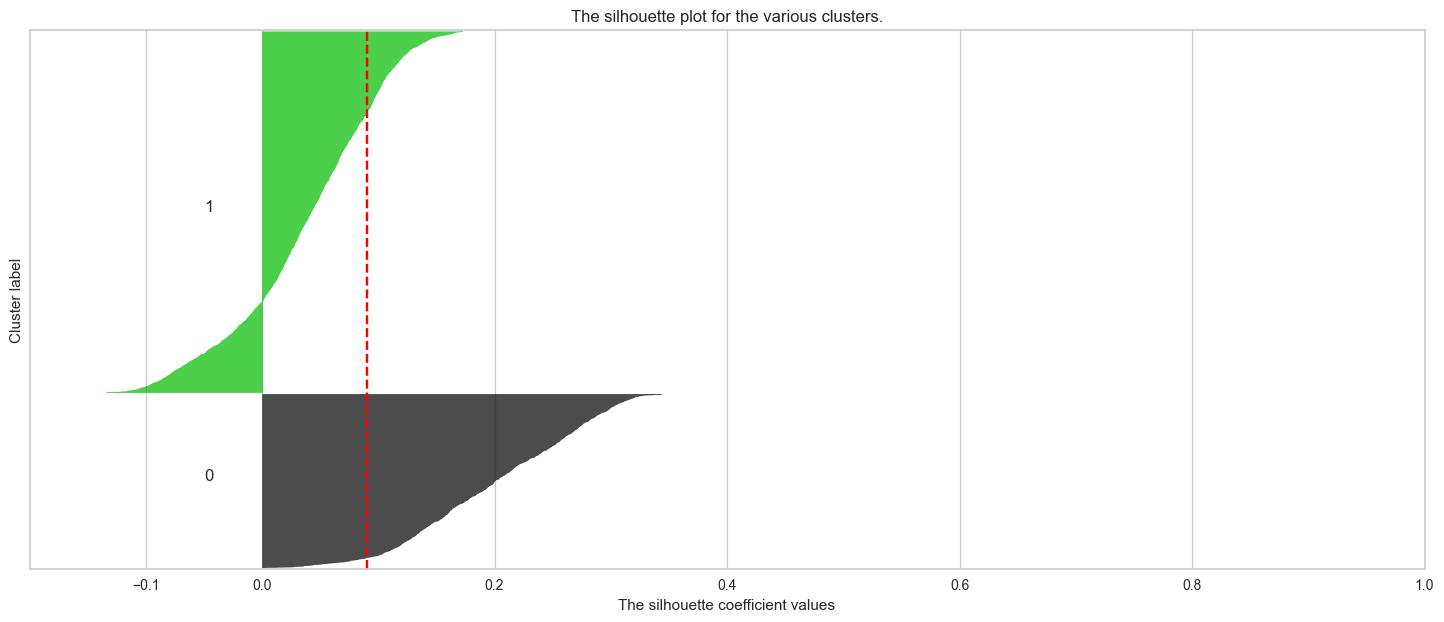

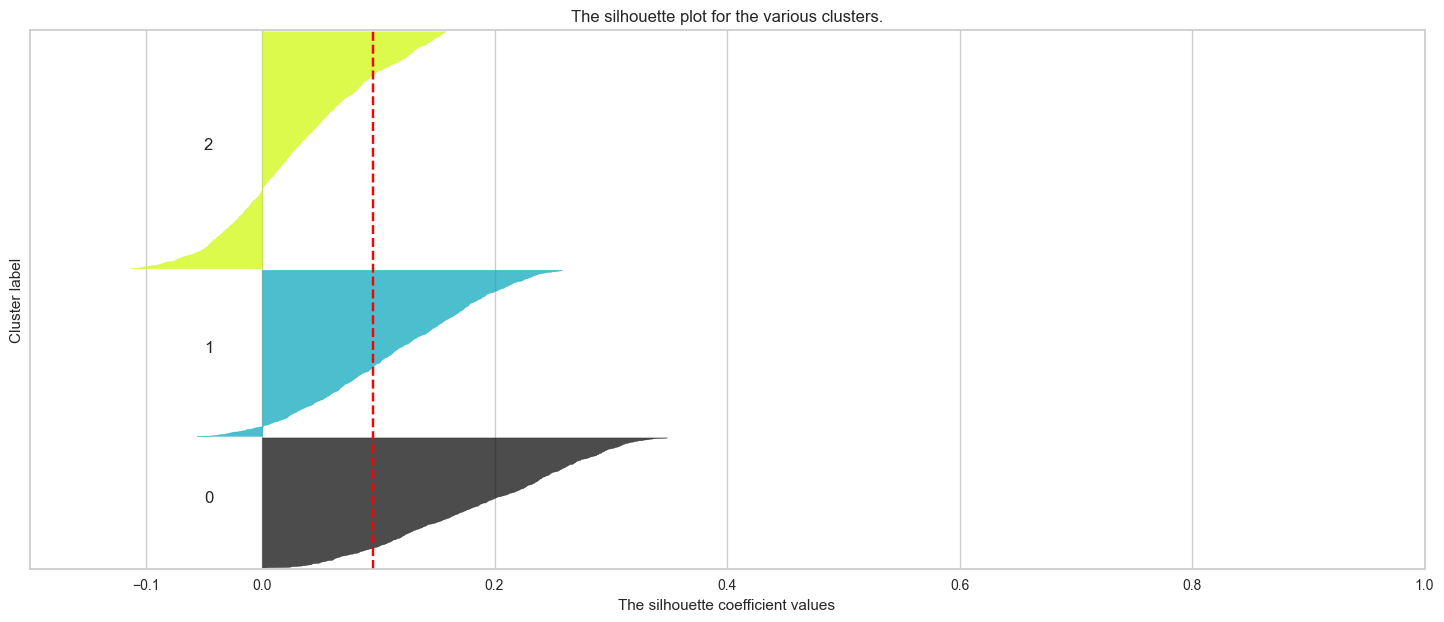

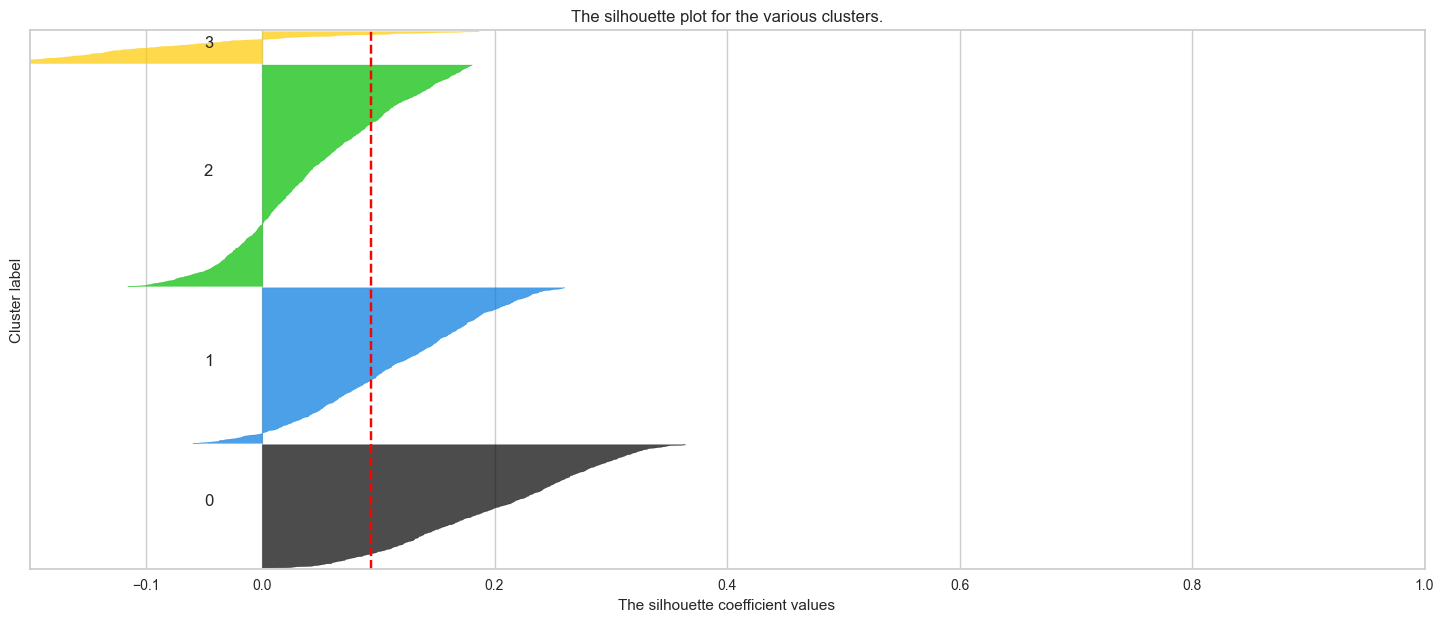

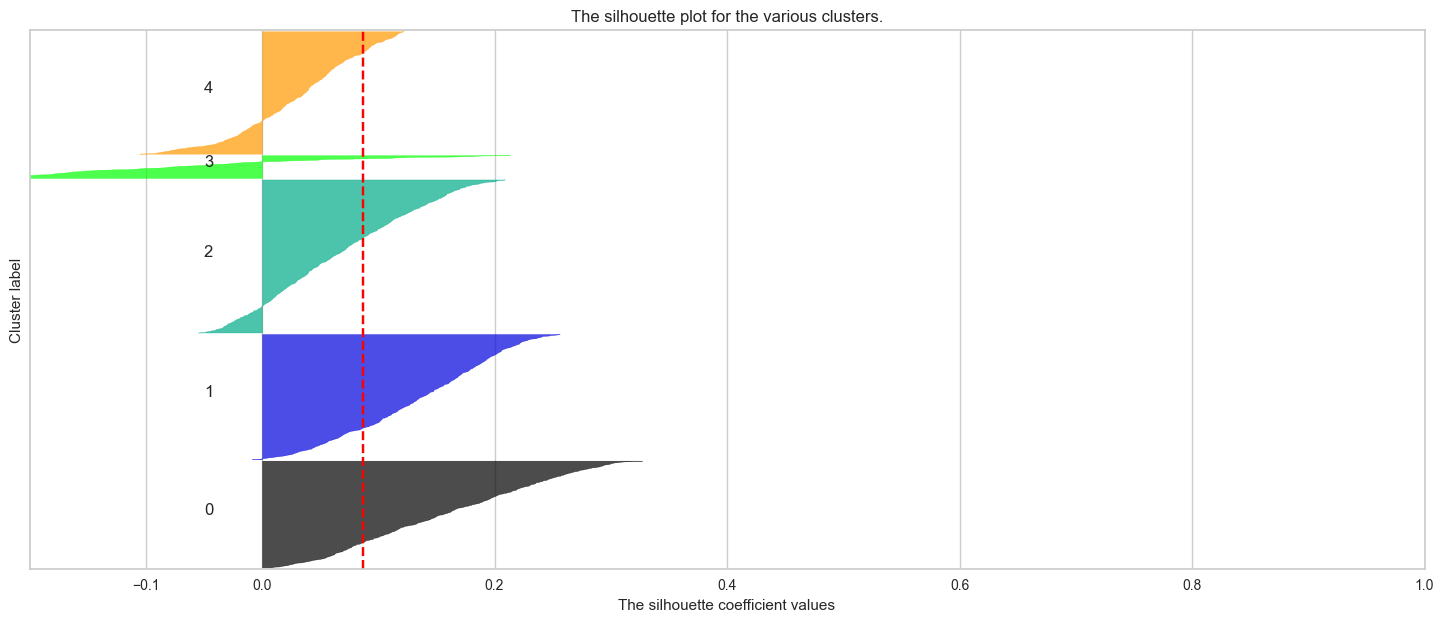

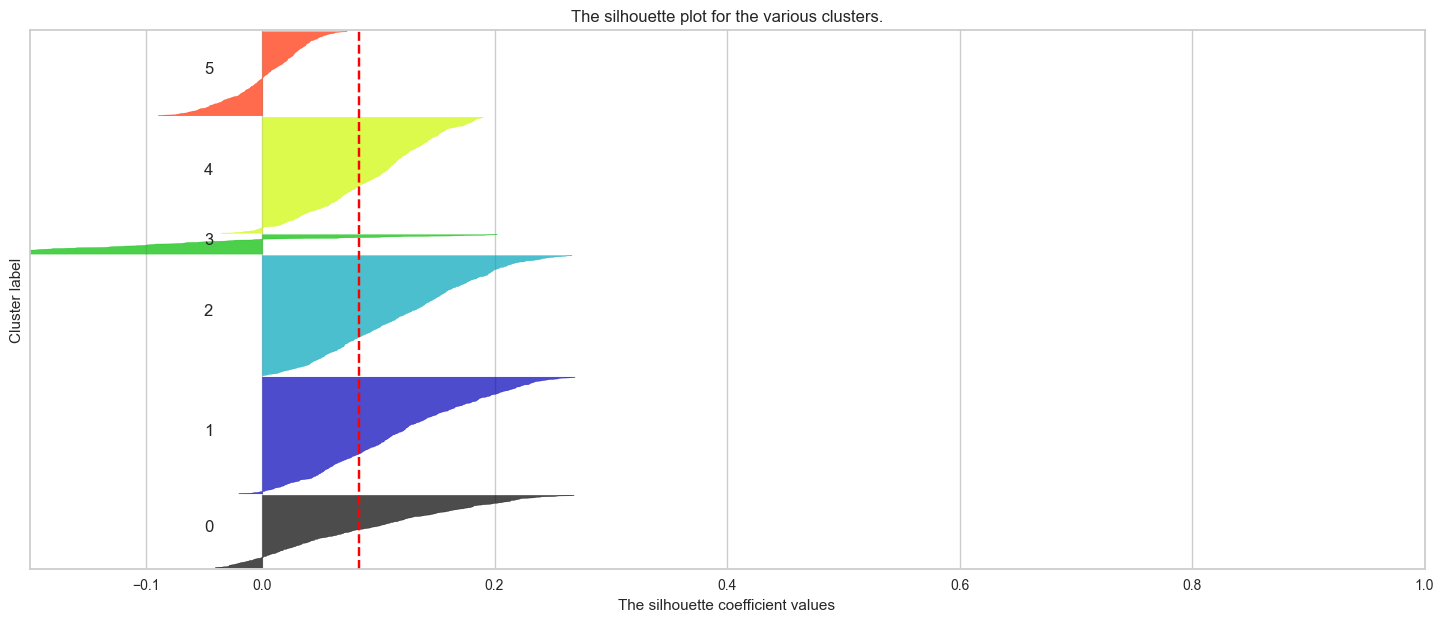

In [175]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_scaled
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

